# Applied Data Analysis - Course project

Below, you will find a list of tasks for this project. Note that the tasks described here are more high-level and less specific than those you were given in the first project. The goal is to provide you with more freedom to implement the analysis in ways in which you best see fit and also explore the questions which most interest you. Of course, there will be more than one solution to achieve each of these tasks. Your overall grade will depend not only on the completion of the tasks but also on your ability to demonstrate the following competencies through your code and analysis:

    -efficient use of tools covered in the course
    -correctness of the analysis and interpretation of results
    -ability to communicate your findings through informative plots
    
Remark: make sure to explain at each step what you are doing and what insights you are finding by adding necessary explanations and text to your Jupyter notebook.

## A. Importing and cleaning the data

You will start by downloading the data from the Kaggle link provided and import it into pandas. You will then need to clean this data using the tools and methods covered in this course. There is not just one correct way to do this. Several solutions will be accepted as long as you demonstrate that you have thoroughly cleaned the data. This includes, of course, dealing with missing values, normalizing entries and text data, dealing with duplicates or incorrect values or getting certain data in more useful formats.

### A.1 Import the necessary tools for the project

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
%matplotlib inline 

from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

import matplotlib.cbook as cbook

import seaborn as sns

import string

from string import ascii_lowercase

import random

import re

import pickle

from datetime import datetime as dt, timedelta

import sqlite3

# Imports the Google Cloud client library:
from google.cloud import translate

# Set the credential:
%set_env GOOGLE_APPLICATION_CREDENTIALS=/Users/plonfat/Desktop/keys/applied data analysis-1e4273421e9e.json

# Initialize the API (google cloud translate):
translate_client = translate.Client()

# Tell the code if need to use Google API:
activation = False      #False because now i have already created the dictionary with google traduction (skip code)


import time

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

env: GOOGLE_APPLICATION_CREDENTIALS=/Users/plonfat/Desktop/keys/applied data analysis-1e4273421e9e.json


### A.2 Import the data and first glance

In [3]:
# TSV = Tab Separated Values
df=pd.read_csv('en.openfoodfacts.org.products.tsv', sep="\t", low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


In [5]:
sh=df.shape
sh

(356027, 163)

In [6]:
# Visualizing the data:
pd.set_option('display.max_columns', 30)
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,...,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


At a first glance, there are lots of NaNs. Lets check that:

(0, 1)

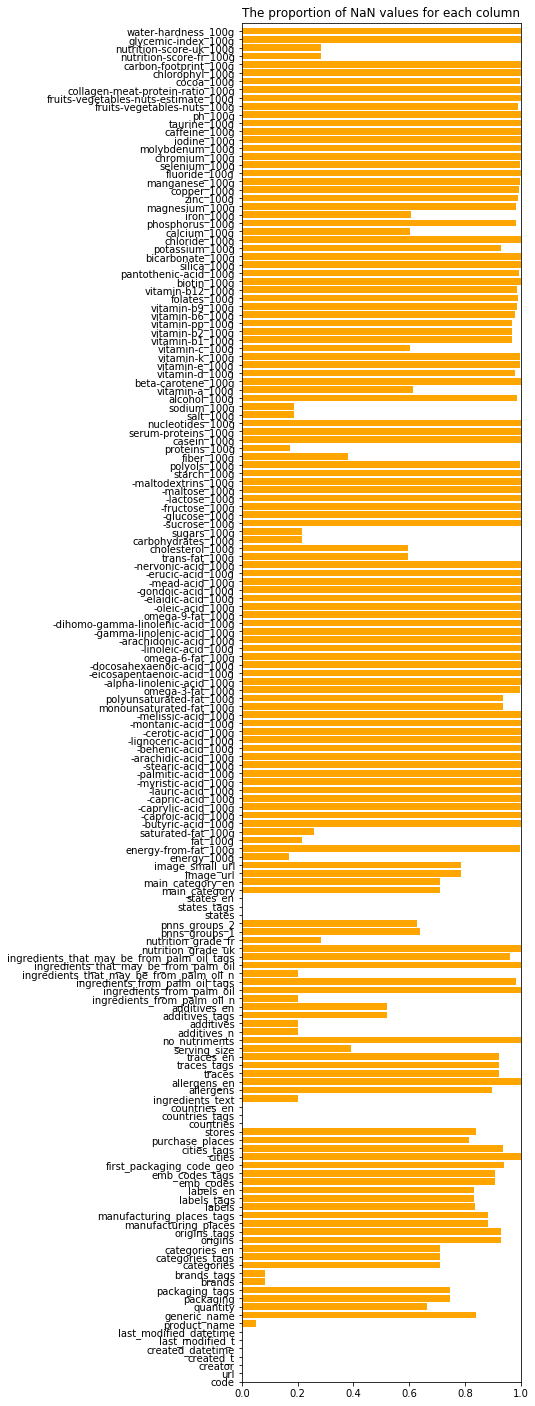

In [7]:
plt.figure(figsize=(5,25))
plt.title('The proportion of NaN values for each column')
plt.barh(df.columns,df.isnull().mean(),color='orange')  
plt.ylim(0,len(df.columns))
plt.xlim(0,1)

Santo cielo! Cleaning the data is in fact an important step. Indeed, I can see here that there is a HUGE proportion of columns which are completely useless. 

What to do now? In the course I have seen that a sample can be a good representative of the population. However, the sample cannot be too small. Deleting any column that has at least a NaN would destroy the database with only a few remaining ones left. 

At least, what I can already do is delete the columns that have more than half of the values missing.

### A.3 Dealing with missing values

As said before, I am first going to delete the NaNs column-wise with a certain threshold.

In [8]:
# Drop with threshold:
df2=df.dropna(thresh=round(sh[0]/2), axis=1, inplace=False)

(0, 1)

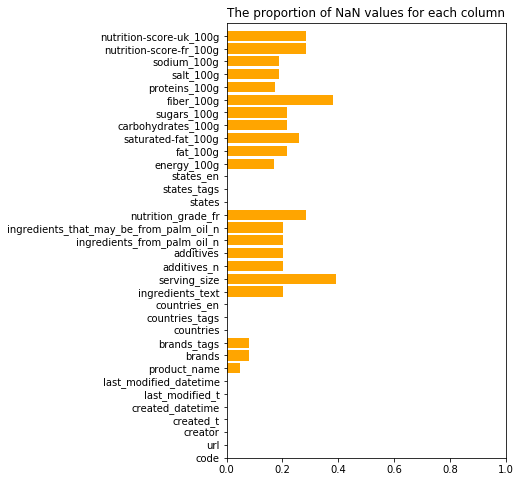

In [9]:
plt.figure(figsize=(5,8))
plt.title('The proportion of NaN values for each column')
plt.barh(df2.columns,df2.isnull().mean(),color='orange')  
plt.ylim(0,len(df2.columns))
plt.xlim(0,1)

Ok, it looks already much better. 

Now, lets delete the NaNs row-wise and see if the number of observations is not reduced too much. I.e. I hope the remaining NaNs will be often all in the same row.

In [10]:
# Deleting row-wise
df3=df2.dropna(axis=0, how='any',inplace=False).reset_index(drop=True)

In [11]:
# Checking if there are still missing values
df3.isnull().sum().sum()

0

In [12]:
# Checking how much observations we have left (almost the half)
df3.shape

(157157, 34)

In [13]:
pd.set_option('display.max_columns', df3.shape[1])
df3.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_en,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_en,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
1,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
2,0000000016124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,Daddy's Muesli,daddy-s-muesli,US,en:united-states,United States,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),1.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,0.0,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055,7.0,7.0
3,0000000016872,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055650,2017-03-09T10:34:10Z,1489055651,2017-03-09T10:34:11Z,Zen Party Mix,Sunridge,sunridge,US,en:united-states,United States,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),0.0,[ roasted-peanuts -> en:roasted-peanuts ] [...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0,12.0
4,0000000018012,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055652,2017-03-09T10:34:12Z,1489055653,2017-03-09T10:34:13Z,Cinnamon Nut Granola,Grizzlies,grizzlies,US,en:united-states,United States,"Organic rolled oats, honey, raisins, almonds, ...",55 g (0.5 cup),0.0,[ organic-rolled-oats -> en:organic-rolled-oa...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.02286,0.009,0.0,0.0


We have now a database cleaned of any NaNs that still has almost half of the initial number of observations (row-wise). 

I think the number of observations is still decent and sufficient to be a good sample of our dataset. 

### A.4 Deleting redundant columns

When I look at our database, I noticed some redundant columns could be removed.

In [14]:
df4=df3.drop(['created_t','last_modified_t','brands_tags','countries','countries_tags','states','states_tags','additives','states_en'],1)

df4.head()

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,0.0,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
1,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,0.0,0.0,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
2,0000000016124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09T10:35:11Z,2017-03-09T10:35:12Z,Organic Muesli,Daddy's Muesli,United States,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),1.0,0.0,0.0,c,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055,7.0,7.0
3,0000000016872,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09T10:34:10Z,2017-03-09T10:34:11Z,Zen Party Mix,Sunridge,United States,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),0.0,0.0,0.0,d,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0,12.0
4,0000000018012,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09T10:34:12Z,2017-03-09T10:34:13Z,Cinnamon Nut Granola,Grizzlies,United States,"Organic rolled oats, honey, raisins, almonds, ...",55 g (0.5 cup),0.0,0.0,0.0,b,1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.02286,0.009,0.0,0.0


### A.5 Normalizing entries and text data

#### A.5.1 Countries

The database is still super dirty. Indeed, I have to format the text correctly. Let's first identify whether there are irregularities in the database or not. A good way to see that is the following:

In [15]:
#checking if there are redundant columns row-wise.
row_check = np.zeros((df4.shape[1],1), dtype=int)

for i in range(0,df4.shape[1]):
    row_check[i] = len(pd.crosstab(index=df4.iloc[:,i], columns="count"))

# Eventually convert the matrix into a panda dataframe
row_check = pd.DataFrame(data=row_check,index=df4.columns,columns=['Number of different inputs'])
row_check

,Number of different inputs
code,157157
url,157157
creator,1424
created_datetime,63792
last_modified_datetime,62749
product_name,111773
brands,28319
countries_en,307
ingredients_text,130071
serving_size,20975


This table allows me to see if there are any issues within the number of observations. 

For example 307 different countries is impossible since there are only 195 recognized countries in the world in 2019.

Let's have a look at it more in detail: 

In [16]:
countries_list=pd.crosstab(index=df4.countries_en, columns="count")
pd.set_option('display.max_rows', len(countries_list))
countries_list

col_0,count
countries_en,
"Algeria,Belgium,Brazil,Cameroon,Canada,France,Germany,India,Italy,Luxembourg,Mali,Martinique,Morocco,Netherlands,Portugal,Réunion,Saudi Arabia,Senegal,Spain,Switzerland,United Kingdom,United States",1
"Algeria,Belgium,Canada,France,Morocco,Switzerland",1
"Algeria,Belgium,Egypt,France,Morocco,Qatar,Switzerland,Tunisia,United Arab Emirates",1
"Algeria,Belgium,France,Germany,Guadeloupe,Italy,Lebanon,Luxembourg,Martinique,Morocco,Netherlands,Portugal,Réunion,Senegal,Spain,Switzerland,United Kingdom",1
"Algeria,Belgium,France,Poland,Portugal",1
"Algeria,France",1
Andorra,1
"Andorra,France",1
"Andorra,Spain",1


I can see that some similar products are present in more than one single country. Since I suppose that a good purpose of this database is to deliver insights about the food habits arround the world I will separate these coutries in different rows. I will therefore have a small sample of rows with the same inputs but each time for a single different country.

After a few researches, I found a very interesting function on Stackoverflow.
I will just adapt it and use it in my case.

In [17]:
def separate(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

In [18]:
df5=separate(df4.assign(countries_en=df3.countries_en.str.split(',')), 'countries_en')

Now, let's see how the database has transformed itself:

In [19]:
countries_list=pd.crosstab(index=df5.countries_en, columns="count")
pd.set_option('display.max_rows', len(countries_list))
countries_list.sort_values(by=['count'], ascending=False)

col_0,count
countries_en,
United States,134052
France,17581
Switzerland,3198
Spain,909
United Kingdom,746
Germany,723
Belgium,587
Portugal,201
Canada,181


It looks much better! A last issue is about the countries on this list with "fr:" in front. I need to remove this regular pattern "fr:" and translate the country's name in english. 

They represent only about 40 observations in the entire database (considering its size, it can be easily denied). But as I am a maniac, I will manually translate them.

In [20]:
def transform(s):
    s=s.str.replace('fr:Angleterre','United Kingdom')
    s=s.str.replace('fr:Bourgogne-aube-nogent-sur-seine','France')
    s=s.str.replace('fr:Deutschland','Germany')
    s=s.str.replace('fr:Frankreich','France')
    s=s.str.replace('fr:Frankrijk','France')
    s=s.str.replace('fr:Grande-bretagne','United Kingdom')
    s=s.str.replace('fr:Griekenland','Greece')
    s=s.str.replace('fr:Marseille-5','France')
    s=s.str.replace('Nederland','Netherlands')
    s=s.str.replace('fr:Nederlands','Netherlands')
    s=s.str.replace('fr:Netherlands','Netherlands')
    s=s.str.replace('fr:Puyricard','France')
    s=s.str.replace('fr:Quebec','Canada')
    s=s.str.replace('fr:Schweiz','Switzerland')
    s=s.str.replace('fr:Spanien','Spain')
    s=s.str.replace('fr:Spanje','Spain')
    s=s.str.replace('日本','Japan')
    s=s.str.replace('Other-日本','Japan')
    s=s.str.replace('香港','China')
    s=s.str.replace('Allemagne','Germany')
    s=s.str.replace('Hong Kong','China')
    s=s.str.replace('Other-Japan','Japan')
    s=s.str.replace('Szczecin','Poland')
    
    return s

#using the function to rename the countries:
df5.countries_en=transform(df5.countries_en)

#deleting other countries named "world" or "European Union"
df5=df5[df5.countries_en != 'World']
df5=df5[df5.countries_en != 'European Union']
df5=df5.reset_index(drop=True)


In [21]:
# Checking again the final list:
countries_list=pd.crosstab(index=df5.countries_en, columns="count")
pd.set_option('display.max_rows', len(countries_list))
countries_list.sort_values(by=['count'], ascending=False)

col_0,count
countries_en,
United States,134052
France,17589
Switzerland,3200
Spain,912
United Kingdom,748
Germany,736
Belgium,587
Portugal,201
Canada,191


In [22]:
print(color.BOLD+'We have now ' +str(len(pd.crosstab(index=df5.countries_en, columns="count")))+' unique different countries represented in our database.'+color.END)


We have now 77 unique different countries represented in our database.


Now, the number of different countries is close to reality.

#### A.5.2 Time

In [23]:
# Transforming the time into Timestamp
df5.created_datetime=pd.to_datetime(df5.created_datetime)
df5.last_modified_datetime=pd.to_datetime(df5.last_modified_datetime)

#### A.5.3 Texts


This part was very tricky to do because the data was very messy. In the ingredient_text columns data, there were no regular parterns I could take advantage of.
Since one of this project's goals is to analyse the occurence of the ingredients, I need to clean and extract them separately.

To reach this goal, I created as an example a super messy list of ingredient_text named TEST you can see below. 

This list contain all the possible different kind of paterns I could find in this very messy column. If the function transform2 can handle this TEST, normally it would handle very well the entire column.

In [26]:
TEST=pd.DataFrame({'list' : ['(This), is 70 % [an,EXAMPLE (of a very messy)],list; from,[ingredients list], which、which(gave_me) ,(a very difficult time), 89, to deal : With (75%), A156. (E43G71I)',
                             'Crème-Fraiche, {sel, sel, sel}, poivre 21,7 % （amandes sans peau) - Banane - Kiwi - Pomme',
                             '[I] hope*, it% works; [(CORRECTLY ,now, _because_ it was, a %Pain_ in the a**)]',
                            ]})

In [24]:
def transform2(s):
    
    # Lower case for all characters
    s = s.str.lower()
    
    # Change all separating characters into commas
    s = s.str.replace(';',',')
    s = s.str.replace(':',',')
    s = s.str.replace('、',', ')  #special for Japanese characters
    
    s = s.str.replace('（',', ')  #special for Japanese characters
    s = s.str.replace('）',',')

    s = s.str.replace('\(',',')
    s = s.str.replace('\)',',')
    
    s = s.str.replace('\[',',')
    s = s.str.replace('\]',',')
    
    s = s.str.replace('\{',',')
    s = s.str.replace('\}',',')
    
    s = s.str.replace(' -',',')
    
    # Delete useless characters
    s = s.str.replace('.','')
    s = s.str.replace('%','')
    s = s.str.replace('*','')
    s = s.str.replace('!','')
    s = s.str.replace('+','')
    
    s = s.str.replace('&','and')
     
    # And now delete the patterns of commas:
    s = s.str.replace(',,,',', ')            #set first the most complicated patterns:
    s = s.str.replace(',, ',', ')           
    s = s.str.replace(', ,,',', ')
    s = s.str.replace(',, ',', ')
    s = s.str.replace(' ,,',', ')
    s = s.str.replace(' , ',', ')
    s = s.str.replace(', ,',', ')
    s = s.str.replace('  ,',', ')
    
    s = s.str.replace(',,',', ')
    s = s.str.replace(' ,',', ')
    
    
    # Changing comma between 2 words without spaces:
    for i in string.ascii_lowercase[:26]:
        for j in string.ascii_lowercase[:26]:
            s = s.str.replace(i+','+j,i+','+' '+j)
            s = s.str.replace(i+'_'+j,i+' '+j)
    s = s.str.replace('_','')
    
    #Now delete the commas at start and end of strings and words containing numerical values
    
    for i in range(len(s)):
        
        #deleting words
        s2 = s[i].split(', ')
        
        for j in range(len(s2)):
            s2[j] = ' '.join(a for a in s2[j].split() if not any(b.isdigit() for b in a))
        
        s2 = [x for x in s2 if x != '']
        
        s[i] = ', '.join(s2)
        
        #deleting commas
        s2 = list(s[i])
        if s2[0] == ',':
            s2[0] = ''
        if s2[-1] == ',':
            s2[-1] = ''
        s[i] = ''.join(s2)
        
        #removing duplicates words
        s[i] = ",".join(sorted(set(s[i].split(',')), key=s[i].index))
        
    #Generating the dictionary with google translate API:
    
    #DOING THE FOLLOWING CODE ALLOWS ME TO GO FROM 32,2KK TO 2,4KK CHARACTERS TO TRANSLATE (and save my money though...)
    #If true, generates the dictionary:
    if activation:
        # Split every ingredients into a different row:
        s3 = pd.DataFrame(s.str.split(', ').tolist()).stack().reset_index(drop=True)
    
        # Counting unique values in the ingredient list:
        s4=pd.crosstab(index=s3, columns="count")
        pd.set_option('display.max_rows', len(s3))
        s5=s4.sort_values(by=['count'], ascending=False)
    
        # Exporting only the ingredients:
        ingredients_unique=list(s5.index)
        
        # Creating a dictionnary and using google translate:
        ingredients_dic = {}
        for i in ingredients_unique:
            ingredients_dic[i]=translate_client.translate(i,target_language='en')['translatedText']
        
        # write python dict to a file:
        output = open('ingredients_dic.pkl', 'wb')
        pickle.dump(ingredients_dic, output)
        output.close()
        
    
    # read python dict back from the file:
    pkl_file = open('ingredients_dic.pkl', 'rb')
    ingredients_dic = pickle.load(pkl_file)
    pkl_file.close()

    # Obvious corrections:
    ingredients_dic.update({'sel': 'salt'})
    ingredients_dic.update({'soy lecithin': 'lecithin'})
    ingredients_dic.update({'soy sauce': 'soy sauce'})
    ingredients_dic.update({'soy flour': 'soy flour'})

    # Doing the actual translation from the dictionary:
    for i in range(len(s)):
        s2 = s[i].split(', ')
        for j in range(len(s2)):
            if s2[j] in ingredients_dic:
                s2[j] = ingredients_dic[s2[j]]
            else:
                s2[j] = s2[j].strip()
                if s2[j] in ingredients_dic:
                    s2[j] = ingredients_dic[s2[j]]
                
        s[i] = ", ".join(s2)
    
    
    # Lower case for all characters
    s = s.str.lower()
        
    return s


In [25]:
#Let see if this function transform correctly our test text data:

#TEST_t2=transform2(TEST.list)  #had to put into comment but its the legit result

print(color.BOLD+'The example:'+color.END)
print(TEST.list[0])
print(TEST.list[1])
print(TEST.list[2])
print(' ')
print(color.BOLD+'The result after transformation:'+color.END)

#print(TEST_t2[0])
#print(TEST_t2[1])
#print(TEST_t2[2])

print('this, is, an, example, of a very messy, list, from, ingredients list, which, gave me, a very difficult time, to deal, with')
print('fresh cream, salt, pepper, almonds without skin, banana, kiwi, apple')
print('i, hope, it works, correctly, now, because it was, a pain in the a')

The example:
(This), is 70 % [an,EXAMPLE (of a very messy)],list; from,[ingredients list], which、which(gave_me) ,(a very difficult time), 89, to deal : With (75%), A156. (E43G71I)
Crème-Fraiche, {sel, sel, sel}, poivre 21,7 % （amandes sans peau) - Banane - Kiwi - Pomme
[I] hope*, it% works; [(CORRECTLY ,now, _because_ it was, a %Pain_ in the a**)]
 
The result after transformation:
this, is, an, example, of a very messy, list, from, ingredients list, which, gave me, a very difficult time, to deal, with
fresh cream, salt, pepper, almonds without skin, banana, kiwi, apple
i, hope, it works, correctly, now, because it was, a pain in the a


In [26]:
#And now the final transformation:
df5.ingredients_text=transform2(df5.ingredients_text)

### A.6 Understanding nutriments values and eliminating obvious errors

Source:

https://en.wikipedia.org/wiki/Food_energy

First, I had to understand how to use the values for each product. 
The amount of KJ per product is calculated as the following:

    -9kcal/g of fat + 4kcal/g of proteins + 4kcal/g of carbohydrates
    
The amount of sugar is included in carbohydrates.

Macronutriments Fiber and salt do not provide any amount of calories.


Now that we implemented our new features we also want to exclude obvious wrong entries, so that we delete all products with:

    -a feature with a negative entry
    
    -an energy-amount of more than 900kcal (in this case it would be > 9 * 100 = 100% fat which is not possible)

    -more sugars than carbohydrates

    -g_sum (total of inputs) higher than 100g

In [27]:
#Calculating the number of kcal per product:
df5["energy_kcal"] = df5.fat_100g * 9 + (df5.proteins_100g + df5.carbohydrates_100g)* 4

#Calculating the number of kcal per product:
df5["energy_kj_recalculated"] = df5.fat_100g * 37 + (df5.proteins_100g + df5.carbohydrates_100g)* 17

#Calculating the number: 
df5["g_sum"] = round(df5.fat_100g + df5.carbohydrates_100g + df5.proteins_100g + df5.salt_100g)

#Elimination of the potential errors:
for col in df5.columns[15:]:
    if col not in ["energy_100g","nutrition-score-fr_100g","nutrition-score-uk_100g","energy_kcal","energy_kj_recalculated"]:
        df5 = df5.loc[df5[col] <= 100]
    df5 = df5.loc[df5[col] >= 0]

df5 = df5.loc[df5.energy_kcal <= 900]
df5 = df5.loc[df5.carbohydrates_100g >= df5.sugars_100g]
df5 = df5.loc[df5.g_sum <= 100]

df5.reset_index(drop=True)

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_kcal,energy_kj_recalculated,g_sum
0,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 14:32:37,2017-03-09 14:32:37,Peanuts,Torn & Glasser,United States,"peanuts, wheat, wheat flour, sugar, rice flour...",28 g (0.25 cup),0.0,0.0,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.635000,0.250000,0.0,0.0,475.02,1996.51,97.0
1,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 10:35:31,2017-03-09 10:35:31,Organic Salted Nut Mix,Grizzlies,United States,"organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,0.0,0.0,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.224280,0.482000,12.0,12.0,657.14,2721.42,94.0
2,0000000016124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 10:35:11,2017-03-09 10:35:12,Organic Muesli,Daddy's Muesli,United States,"org oats, org hemp granola, org oats, evaporat...",64 g (0.5 cup),1.0,0.0,0.0,c,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.139700,0.055000,7.0,7.0,456.23,1915.54,91.0
3,0000000016872,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 10:34:10,2017-03-09 10:34:11,Zen Party Mix,Sunridge,United States,"roasted peanuts, peanuts, peanut or canola oil...",30 g (0.25 cup),0.0,0.0,0.0,d,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.607820,0.633000,12.0,12.0,543.39,2263.57,92.0
4,0000000018012,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 10:34:12,2017-03-09 10:34:13,Cinnamon Nut Granola,Grizzlies,United States,"organic rolled oats, honey, raisins, almonds, ...",55 g (0.5 cup),0.0,0.0,0.0,b,1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.022860,0.009000,0.0,0.0,461.82,1940.01,93.0
5,0000000018050,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 09:07:42,2017-03-09 09:07:42,Organic Hazelnuts,Grizzlies,United States,organic raw hazelnuts,28 g (0.25 cup),0.0,0.0,0.0,b,2632.0,60.71,3.57,17.86,3.57,10.7,14.29,0.010160,0.004000,0.0,0.0,674.99,2792.82,93.0
6,0000000018265,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 10:35:06,2017-03-09 10:35:06,Energy Power Mix,Sunridge,United States,"yogurt raisins, tamari roasted almonds, organi...",40 g (0.25 cup),0.0,0.0,0.0,d,1464.0,17.50,7.50,42.50,32.50,5.0,7.50,0.284480,0.112000,14.0,14.0,357.50,1497.50,68.0
7,0000000018289,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 10:34:14,2017-03-09 10:34:15,Antioxidant Mix - Berries & Chocolate,Sunridge,United States,"chocolate stars, dehydrated cane juice, sweete...",30 g (0.25 cup),1.0,0.0,0.0,d,2092.0,33.33,6.67,46.67,30.00,6.7,13.33,0.464820,0.183000,15.0,15.0,539.97,2253.21,94.0
8,0000000018319,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 10:35:20,2017-03-09 10:35:20,Organic Quinoa Coconut Granola With Mango,Sunridge,United States,"organic rolled oats, organic evaporated cane j...",55 g (0.5 cup),0.0,0.0,0.0,c,1674.0,10.91,2.73,69.09,27.27,9.1,10.91,0.022860,0.009000,7.0,7.0,418.19,1763.67,91.0
9,0000000018340,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 10:35:21,2017-03-09 10:35:21,Fire Roasted Hatch Green Chile Almonds,Sunridge,United States,"dry roasted almonds, hatch green chile seasoni...",30 g (0.25 cup),2.0,0.0,0.0,d,2372.0,50.00,3.33,23.33,6.67,10.0,6.67,1.270000,0.500000,11.0,11.0,570.00,2360.00,81.0


### A.7 Last details and conclusion

In [28]:
#Rename some columns and replace original df:
df=df5.rename(index=str, columns={"countries_en": "countries", "ingredients_text": "ingredients", "energy_100g": "energy_kj"})

In [29]:
# Checking if there are still missing values
df.isnull().sum().sum()

0

In [30]:
df.shape

(128469, 28)

In [31]:
#Saving the dataframe:
#df.to_pickle('df.p')

Now we have a database which:

    -is completely cleaned of any missing values
    -is translated in one language (except for the orginal product name)
    -is free from obvious errors
    -correctly represents each country 
    -has all columns in useful format
    -has text columns correctly filtered and ready for analysis
    -is saved and ready to be used

In [32]:
print(color.BOLD+'Feel free to look how beautiful it is now:'+color.END)

Feel free to look how beautiful it is now:


In [33]:
#df=pd.read_pickle('df.p')
df.head()

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,ingredients,serving_size,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,energy_kj,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_kcal,energy_kj_recalculated,g_sum
0,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 14:32:37,2017-03-09 14:32:37,Peanuts,Torn & Glasser,United States,"peanuts, wheat, wheat flour, sugar, rice flour...",28 g (0.25 cup),0.0,0.0,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0,475.02,1996.51,97.0
1,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 10:35:31,2017-03-09 10:35:31,Organic Salted Nut Mix,Grizzlies,United States,"organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,0.0,0.0,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0,657.14,2721.42,94.0
2,0000000016124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 10:35:11,2017-03-09 10:35:12,Organic Muesli,Daddy's Muesli,United States,"org oats, org hemp granola, org oats, evaporat...",64 g (0.5 cup),1.0,0.0,0.0,c,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055,7.0,7.0,456.23,1915.54,91.0
3,0000000016872,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 10:34:10,2017-03-09 10:34:11,Zen Party Mix,Sunridge,United States,"roasted peanuts, peanuts, peanut or canola oil...",30 g (0.25 cup),0.0,0.0,0.0,d,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0,12.0,543.39,2263.57,92.0
4,0000000018012,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 10:34:12,2017-03-09 10:34:13,Cinnamon Nut Granola,Grizzlies,United States,"organic rolled oats, honey, raisins, almonds, ...",55 g (0.5 cup),0.0,0.0,0.0,b,1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.02286,0.009,0.0,0.0,461.82,1940.01,93.0


## B. Manipulating the data

You will work with the data to investigate some properties of your choice. Your goal is to choose 3 interesting questions to answer about the data and perform the necessary steps for the analysis.

The questions that you choose must be complex enough to allow for some substantial data manipulation. As a guideline here is a sample topic of analysis

Topic: 

    -Investigate the macronutrient breakdown across various foods (this is the percentage of calories that come     from the 3 macronutrient groups: carbohydrates, protein and fats). 

    -What are the foods that have the highest ratios of each macronutrient? What are the foods that are most balanced? 

    -What is the macronutrient breakdown across different countries? 

    -Can you notice some trends or insights about the data?

For each of your 3 questions choose appropriate visual methods to communicate your findings

### B.1 What is the macronutrient breakdown across the 8 countries the MOST represented in our database?

In [34]:
# Selecting the number of countries:
list_numb=8

# Selecting the macronutrients in the analysis:
macro_list = ['fat_100g','carbohydrates_100g','proteins_100g']

# Selecting the countries with the highest occurence in the DataFame:
countries_list=pd.crosstab(index=df.countries, columns="count").sort_values(by='count',ascending=False).index.values[0:list_numb]

# Creating the shape of the matrix:
macro_avg = np.zeros((len(countries_list),len(macro_list)), dtype=float)

# Grouping the database by Country and calculating the mean for each macronutriment among the observations:
for i in range(0,len(countries_list)):
    for j in range(0,len(macro_list)):
        macro_avg[i,j]=df.groupby('countries')[macro_list[j]].mean()[countries_list[i]]

# Converting back to a dataframe:
macro_avg = pd.DataFrame(data=macro_avg,columns=macro_list)

macro_avg.insert(loc=0, column='countries', value=countries_list)


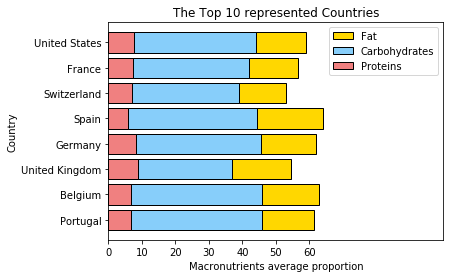

In [35]:
#Creating the horizontal plot bar:
colors = ['gold', 'lightskyblue', 'lightcoral']
labels = ['Fat','Carbohydrates','Proteins']

for i in range(1,len(macro_avg.columns)):
    plt.barh(macro_avg['countries'], macro_avg[macro_avg.columns[i]],color=colors[i-1], edgecolor='black', left=macro_avg.iloc[:, i+1:4].sum(axis=1), label=labels[i-1])
plt.xticks(np.arange(0,70,10))
plt.xlim(0,100)

plt.gca().invert_yaxis()

plt.title('The Top 10 represented Countries')
plt.xlabel('Macronutrients average proportion')
plt.ylabel('Country')
plt.legend(loc="upper right")


The issue with this bar chart is that I cannot easily compare the proportions between countries since the scale is not the same for each one of them.

This other graph will surely be more representative:

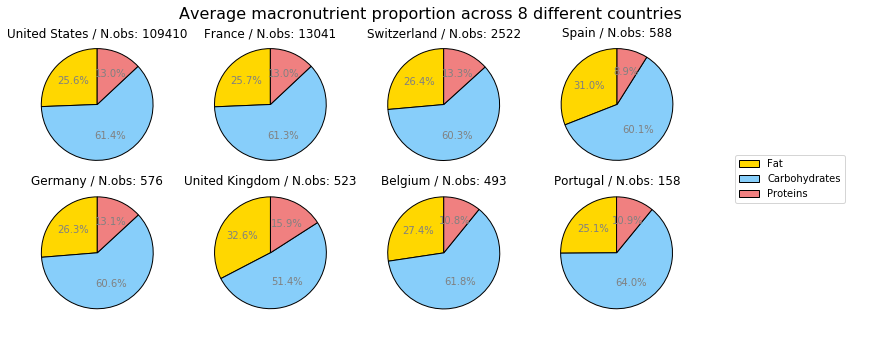

In [36]:
#Creating the pie chart:
ncol=4   #for subplot
nrow=2   #for subplot

obs = pd.crosstab(index=df.countries, columns="count").sort_values(by='count',ascending=False).values[0:list_numb]

fig = plt.figure()

fig.suptitle('Average macronutrient proportion across 8 different countries', fontsize=16)

fig.set_figheight(5)
fig.set_figwidth(15)

for i in range((ncol*2+1)):
    if i < ncol:
        ax = fig.add_subplot(nrow,ncol+1,i+1)
        patches, texts, autotexts = ax.pie(macro_avg.iloc[i,1:], colors = colors, autopct='%1.1f%%',
                                           startangle=90, wedgeprops = { 'linewidth': 1, "edgecolor" :"k" })
        for text in texts:
            text.set_color('grey')
        for autotext in autotexts:
            autotext.set_color('grey')
                
        # Title:
        ax.set_title(countries_list[i]+' / N.obs: '+str(obs[i][0]))
            
        # Equal aspect ratio ensures that pie is drawn as a circle:
        ax.axis('equal')
        
    elif i > ncol:
        ax = fig.add_subplot(nrow,ncol+1,i+1)
        patches, texts, autotexts = ax.pie(macro_avg.iloc[i-1,1:], colors = colors, autopct='%1.1f%%', 
                                           startangle=90, wedgeprops = { 'linewidth': 1, "edgecolor" :"k" })
        for text in texts:
            text.set_color('grey')
        for autotext in autotexts:
            autotext.set_color('grey')
                
        # Title:
        ax.set_title(countries_list[i-1]+' / N.obs: '+str(obs[i-1][0]))
            
        # Equal aspect ratio ensures that pie is drawn as a circle:
        ax.axis('equal')
                
    else:
        ax2 = fig.add_subplot(nrow-1,ncol+1,i+1)
        ax2.axis("off")
        ax2.legend(patches,labels, loc="center")

plt.show()


#### B.1.1 Conclusions:

Now I "could" take the following conclusions more easily:

    -I can see that the country that tends to have the highest proportion of fat in its products is UK.
    
    -On the other hand, UK has the smallest proportion of Carbohydrates.

However, there are some drawbacks...

#### B.1.2 Drawbacks:

Unfortunately, if I consider the number of observations I have per country inside the database, I cannot draw
sure (100%) conclusions about the macronutrient breakdown. Indeed, among the database, the number of
observations is ABSOLUTELY not evenly distributed among the different countries. One should consider the number of observations relatively to the country's population in order to be sure the sample is in scale and correctly representative.

### B.2 Considering the macronutrients, what are the foods that are the most unbalanced VS what are the foods that are most balanced? 

https://en.wikipedia.org/wiki/List_of_macronutrients

Since the Macronutriments Fiber and salt doesn't provide any amount of calories. I am only going to consider the Macronutriments Fat, Carbohydrates and Proteins.

In [37]:
# Extract a Macronutriment database:
macro = df.loc[:,['product_name','fat_100g','carbohydrates_100g','proteins_100g']].copy()   #avoid chain

# Create Macronutriement sum:
macro['macro_sum'] = (macro.fat_100g + macro.carbohydrates_100g + macro.proteins_100g)

# Create the percentage for each Macronutrient:
macro['fat_per'] = macro['fat_100g']*100/macro['macro_sum']
macro['car_per'] = macro['carbohydrates_100g']*100/macro['macro_sum']
macro['pro_per'] = macro['proteins_100g']*100/macro['macro_sum']

# Absolute differences between a 33.33% (which is the most balanced)
macro['fat_dif'] = abs(33.33-macro['fat_per'])
macro['car_dif'] = abs(33.33-macro['car_per'])
macro['pro_dif'] = abs(33.33-macro['pro_per'])

# Sum of the differences:
macro['dif_sum'] = (macro.fat_dif + macro.car_dif + macro.pro_dif)

# Keeping unique product_name:
macro = macro.drop_duplicates(subset=['product_name'], keep='first').reset_index(drop=True)

# Sorting the products that have the smallest and biggest dif sum:
macro_least = macro.sort_values(by='dif_sum',ascending=False).reset_index().loc[0:list_numb,['product_name','fat_per','car_per','pro_per']].copy()

macro_most = macro.sort_values(by='dif_sum',ascending=True).reset_index().loc[0:list_numb+1,['product_name','fat_per','car_per','pro_per']].copy()

# Droping very similar product:
macro_most = macro_most[ macro_most.product_name != 'Shy Brothers Farm, Cloumage, Creamy Fresh Cheese, Rosemary + Cumin'].reset_index(drop=True)


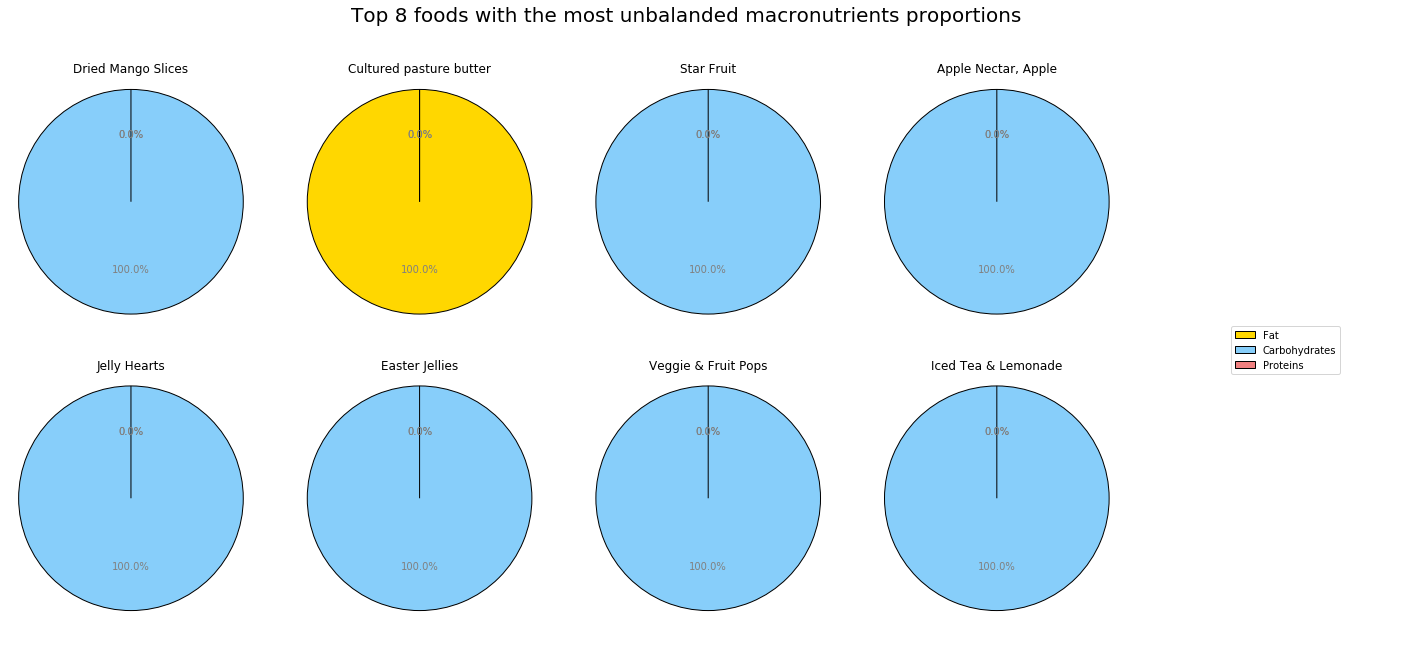

In [38]:
#Creating the pie chart:
ncol=4   #for subplot
nrow=2   #for subplot

fig = plt.figure()

fig.suptitle('Top 8 foods with the most unbalanded macronutrients proportions', fontsize=20)

fig.set_figheight(10)
fig.set_figwidth(25)

for i in range((ncol*2+1)):
    if i < ncol:
        ax = fig.add_subplot(nrow,ncol+1,i+1)
        patches, texts, autotexts = ax.pie(macro_least.iloc[i,1:], colors = colors, autopct='%1.1f%%',
                                           startangle=90, wedgeprops = { 'linewidth': 1, "edgecolor" :"k" })
        for text in texts:
            text.set_color('grey')
        for autotext in autotexts:
            autotext.set_color('grey')
                
        # Title:
        ax.set_title(macro_least.product_name[i])
            
        # Equal aspect ratio ensures that pie is drawn as a circle:
        ax.axis('equal')
        
    elif i > ncol:
        ax = fig.add_subplot(nrow,ncol+1,i+1)
        patches, texts, autotexts = ax.pie(macro_least.iloc[i-1,1:], colors = colors, autopct='%1.1f%%', 
                                           startangle=90, wedgeprops = { 'linewidth': 1, "edgecolor" :"k" })
        for text in texts:
            text.set_color('grey')
        for autotext in autotexts:
            autotext.set_color('grey')
                
        # Title:
        ax.set_title(macro_least.product_name[i-1])
            
        # Equal aspect ratio ensures that pie is drawn as a circle:
        ax.axis('equal')
                
    else:
        ax2 = fig.add_subplot(nrow-1,ncol+1,i+1)
        ax2.axis("off")
        ax2.legend(patches,labels, loc="center")

plt.show()

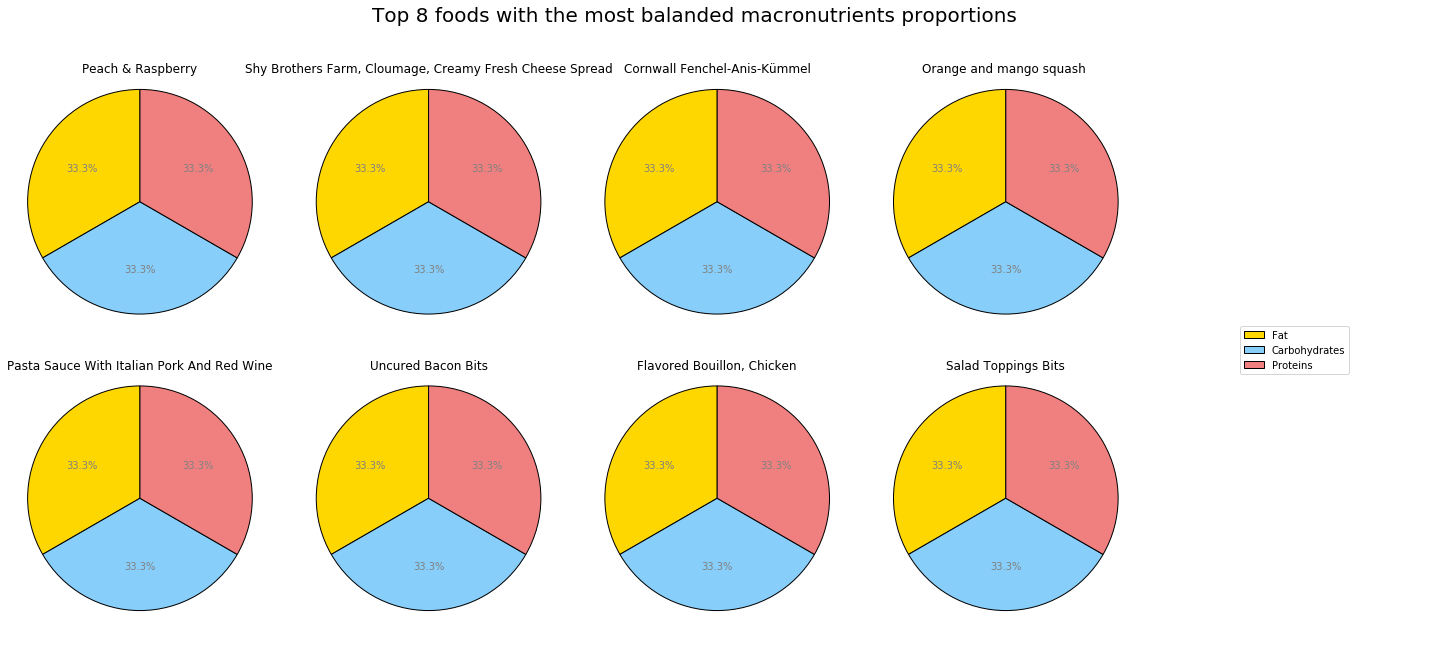

In [39]:
#Creating the pie chart:
ncol=4   #for subplot
nrow=2   #for subplot

fig = plt.figure()
fig.suptitle('Top 8 foods with the most balanded macronutrients proportions', fontsize=20)
fig.set_figheight(10)
fig.set_figwidth(25)

for i in range((ncol*2+1)):
    if i < ncol:
        ax = fig.add_subplot(nrow,ncol+1,i+1)
        patches, texts, autotexts = ax.pie(macro_most.iloc[i,1:], colors = colors, autopct='%1.1f%%',
                                           startangle=90, wedgeprops = { 'linewidth': 1, "edgecolor" :"k" })
        for text in texts:
            text.set_color('grey')
        for autotext in autotexts:
            autotext.set_color('grey')
                
        # Title:
        ax.set_title(macro_most.product_name[i])
            
        # Equal aspect ratio ensures that pie is drawn as a circle:
        ax.axis('equal')
        
    elif i > ncol:
        ax = fig.add_subplot(nrow,ncol+1,i+1)
        patches, texts, autotexts = ax.pie(macro_most.iloc[i-1,1:], colors = colors, autopct='%1.1f%%', 
                                           startangle=90, wedgeprops = { 'linewidth': 1, "edgecolor" :"k" })
        for text in texts:
            text.set_color('grey')
        for autotext in autotexts:
            autotext.set_color('grey')
                
        # Title:
        ax.set_title(macro_most.product_name[i-1])
            
        # Equal aspect ratio ensures that pie is drawn as a circle:
        ax.axis('equal')
                
    else:
        ax2 = fig.add_subplot(nrow-1,ncol+1,i+1)
        ax2.axis("off")
        ax2.legend(patches,labels, loc="center")

plt.show()

#### B.2.1 Conclusions

With this small sample (only the first 8 products in each case), I can visualize which one is the most balanced or the most unbalanced. I can also infer which type of product will have more chance to be very balanced or not.

#### B.2.2 Drawbacks

The issue with this representation is that I can only confortably see the 8 (in this case) top products. However, I realised that actually much more of them could be represented in this list (as the database is so big). Therefore, a table would be a better solution to visualize the result. 

For example:

In [40]:
macro.sort_values(by='dif_sum',ascending=False).reset_index().loc[:,['product_name','fat_per','car_per','pro_per']].head(20)


,product_name,fat_per,car_per,pro_per
0,Dried Mango Slices,0.0,100.0,0.0
1,Cultured pasture butter,100.0,0.0,0.0
2,Star Fruit,0.0,100.0,0.0
3,"Apple Nectar, Apple",0.0,100.0,0.0
4,Jelly Hearts,0.0,100.0,0.0
5,Easter Jellies,0.0,100.0,0.0
6,Veggie & Fruit Pops,0.0,100.0,0.0
7,Iced Tea & Lemonade,0.0,100.0,0.0
8,Light Fruit Cocktail,0.0,100.0,0.0
9,"Indulgio, Iced Tea, Peach",0.0,100.0,0.0


### B.3 What are the ingredients in the foods that are the most calorific


In [41]:
# Extract an energy database:
energy = df.loc[:,['ingredients','energy_kj_recalculated']].copy()   #avoid chain
energy.head()

,ingredients,energy_kj_recalculated
0,"peanuts, wheat, wheat flour, sugar, rice flour...",1996.51
1,"organic hazelnuts, organic cashews, organic wa...",2721.42
2,"org oats, org hemp granola, org oats, evaporat...",1915.54
3,"roasted peanuts, peanuts, peanut or canola oil...",2263.57
4,"organic rolled oats, honey, raisins, almonds, ...",1940.01


In [61]:
# Separate all ingredients and assign the energy to each one of them:
# Separate function as written earlier:
energy2=separate(energy.assign(ingredients=energy.ingredients.str.split(',')), 'ingredients')

# Grouping by ingredients and sorting:
energy2 = energy2.groupby('ingredients').mean().sort_values(by=['energy_kj_recalculated'], ascending=False)[0:20]

energy2.head()

,energy_kj_recalculated
ingredients,
pure sunflower oil,3700.0
omegaflo flax oil,3700.0
canola / vegetable oil,3700.0
organic expeller pressed refined high oleic sunflower seed oil,3700.0
organic expeller pressed unrefined sesame seed oil,3700.0


#### B.3.1 Conclusion

I can notice that oil is a major ingredient in the products that have the highest caculated kj.

## C. Text data (99% of work was done in point A)

You will filter and group your data based on the ingredients_text column. Your goal is to find the five most common ingredients.

In [43]:
# Split every ingredients into a different row:
ingredients_all=pd.DataFrame(df.ingredients.str.split(', ').tolist()).stack().reset_index(drop=True)

# Counting unique values in the ingredient list:
ingredients_list=pd.crosstab(index=ingredients_all, columns="count")
pd.set_option('display.max_rows', len(ingredients_list))
ingredients_list.sort_values(by=['count'], ascending=False)[0:20]

col_0,count
row_0,
salt,69557
sugar,62858
water,48441
wheat flour,22713
citric acid,20688
niacin,17333
riboflavin,17299
folic acid,17247
corn syrup,14856


#### C.1 Conclusion

Without any surprise I can see that salt, sugar and water are in the top 3. I volontary extended the list in order to have more insights.

## D. Time-series analysis

You will investigate more closely the created_datetime and last_modified_datetime. First, you will analyze the mean time difference between these two values. And second, you will analyze the mean number of created items per month over the timeline of the data. For the second question, you will also choose an appropriate method to visualize your findings.

### D.1 Mean time difference analysis:

In [44]:
# Extracting a time database:
time = df.loc[:,['product_name','countries','created_datetime','last_modified_datetime']].copy()   #avoid chain

# Keeping unique product_name:
time = time.drop_duplicates(subset=['product_name'], keep='first').reset_index(drop=True)

# Computing the difference:
time['difference_datetime']= time.last_modified_datetime - time.created_datetime

# Finally computing the mean:
print('The mean difference time is about: '+ str(time.loc[:,"difference_datetime"].mean()))

time.head()

The mean difference time is about: 76 days 15:55:15.321889


,product_name,countries,created_datetime,last_modified_datetime,difference_datetime
0,Peanuts,United States,2017-03-09 14:32:37,2017-03-09 14:32:37,00:00:00
1,Organic Salted Nut Mix,United States,2017-03-09 10:35:31,2017-03-09 10:35:31,00:00:00
2,Organic Muesli,United States,2017-03-09 10:35:11,2017-03-09 10:35:12,00:00:01
3,Zen Party Mix,United States,2017-03-09 10:34:10,2017-03-09 10:34:11,00:00:01
4,Cinnamon Nut Granola,United States,2017-03-09 10:34:12,2017-03-09 10:34:13,00:00:01


When I look at the first observations (which have differences of seconds), 76 days seem to be quite a lot. 

Let's figure out if this is generalized in some countries but not in others:

In [45]:
# Mean difference time per country:
smallest_diff = time.groupby('countries').difference_datetime.agg(pd.Series.mean).sort_values(axis=0, ascending=True)[0:10]
smallest_diff

countries
Réunion                 0 days 00:27:09
Senegal          0 days 00:39:32.500000
Costa Rica              0 days 00:49:04
South Africa     3 days 12:51:25.333333
Croatia                 3 days 22:54:09
United States    4 days 03:11:32.826665
Ireland          4 days 11:30:04.800000
Cambodia                6 days 11:34:14
New Zealand      7 days 10:40:29.333333
Guadeloupe      12 days 14:19:11.600000
Name: difference_datetime, dtype: timedelta64[ns]

In [46]:
# Mean difference time per country:
biggest_diff = time.groupby('countries').difference_datetime.agg(pd.Series.mean).sort_values(axis=0, ascending=False)[0:10]
biggest_diff

countries
Algeria                     1402 days 20:43:20.333333
French Polynesia                   1345 days 22:45:23
Denmark                      950 days 22:47:11.346153
Scotland                     937 days 22:29:47.500000
Greece                              875 days 15:39:37
Belgium                      699 days 16:52:46.109785
French Guiana                       613 days 17:22:11
Spain                        520 days 12:09:51.694915
France                       494 days 07:33:51.878404
Saint Pierre and Miquelon    486 days 01:52:05.600000
Name: difference_datetime, dtype: timedelta64[ns]

#### D.1.2 Conclusion

With these 2 tables, what I can see is that there is for United States (which represents the largest proportion of the database), a small mean difference time.

However, for France which represents the second largest one, a higher mean difference time that is surely bringing up the total mean difference time to the aboved-mentionned 76 days.

### D.2 The mean number of created items per month over the timeline of the data

In [47]:
# Sorting values on created_datetime: 
time2 = time.sort_values(by=['created_datetime'], ascending=True).reset_index(drop=True)

# Finding time boundaries in df:
min_datetime = time2.created_datetime.min()
max_datetime = time2.created_datetime.max() + pd.Timedelta(days=31) # add one month to conpensate not inclusive upper boundary in range late on.

# Creating monthly range with these boundaries:
monthly = pd.date_range(str(min_datetime.year)+'-'+str(min_datetime.month),
                        str(max_datetime.year)+'-'+str(max_datetime.month), freq='M')

# Creating a dataframe with the datetimeindex:
data = np.zeros((len(monthly)), dtype=int)
time3 = pd.DataFrame({'month': monthly, 'count': data})

# Keeping only month and year from the month range:
time3.month = time3.month.apply(lambda x: x.strftime('%Y-%m')) 

# Keeping only month and year form the created_datetime:
t_cr_date = time2.created_datetime.apply(lambda x: x.strftime('%Y-%m')) 

# For loop to count the number of days in a particular month:
for i in range(len(time3)):
    time3.at[i, 'count'] = t_cr_date.eq(time3.month[i]).sum()
    
# Checking that the sum of count is = to the total number of observations:
if time3['count'].sum() == len(time2.created_datetime):
    print('The numbers are equal !')
    
# Finally, retransform to timestamp and set it as index:
time3.month=pd.to_datetime(time3.month)
time3.set_index('month', inplace=True)

time3.head()

The numbers are equal !


,count
month,
2012-02-01,3
2012-03-01,16
2012-04-01,38
2012-05-01,107
2012-06-01,224


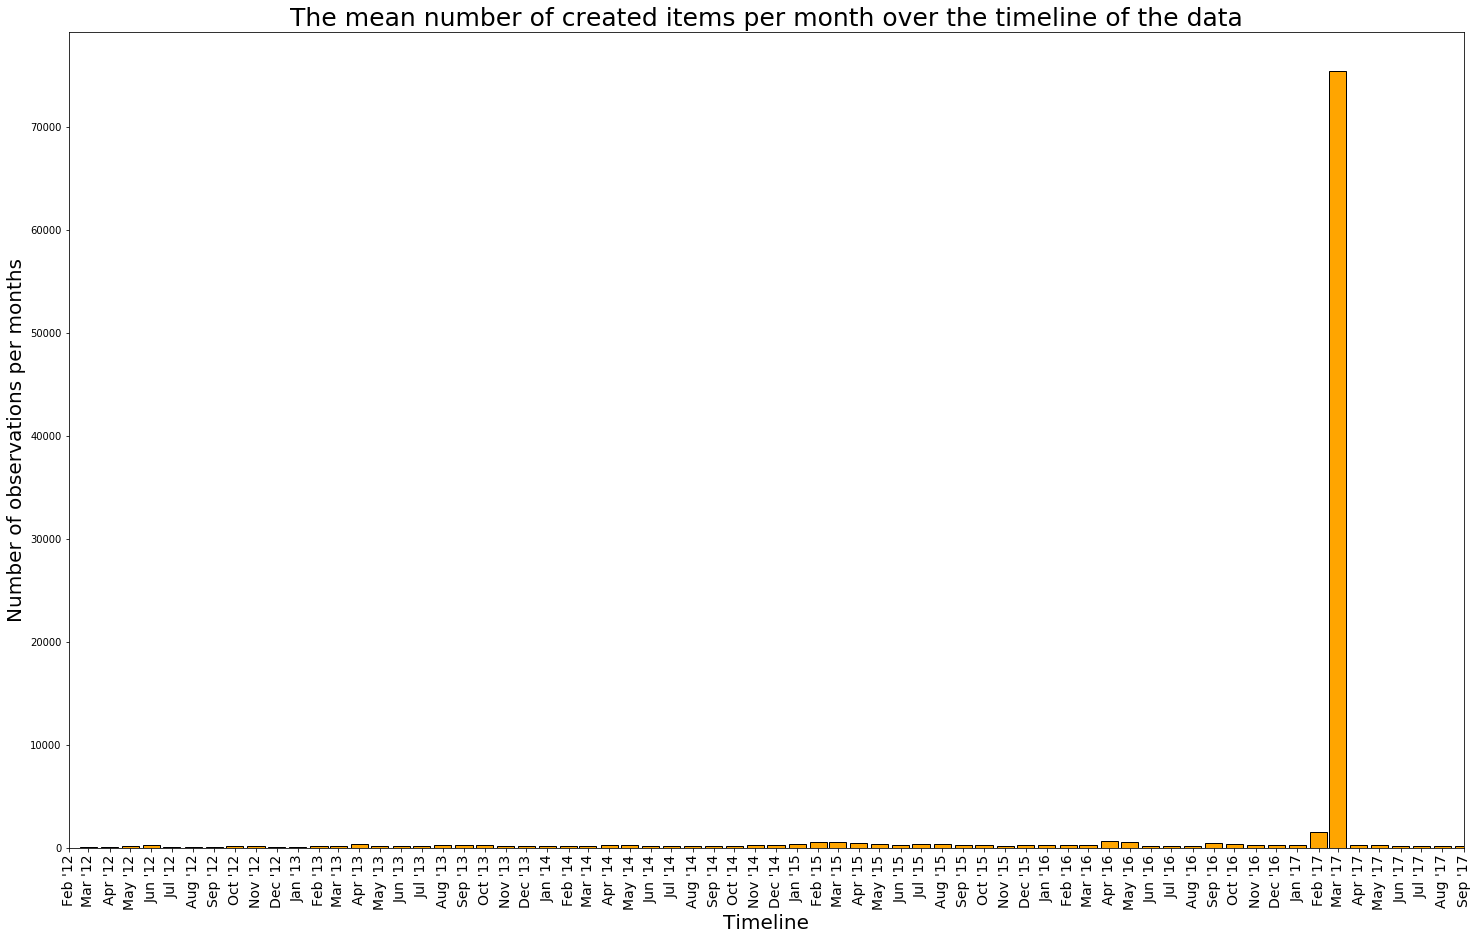

In [48]:
# Graph:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(25)

dates=time3.index

plt.bar(dates,time3['count'], width=25, color='orange', edgecolor = "black")

plt.xlabel('Timeline', fontsize='20')
plt.ylabel('Number of observations per months', fontsize='20')
plt.title('The mean number of created items per month over the timeline of the data', fontsize='25')

ax = plt.gca()  #this is how to get the x axis

months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b '%y")

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()

plt.xlim(dates.min(),dates.max())
plt.xticks(fontsize=14, rotation=90)

plt.show()

#### D.2.1 Conclusion

With this graph, I can quickly visualize that a large part of the database has been creating in one particular month. 

In [49]:
percentage=round((time3['count'].max()/len(time2.created_datetime))*100)

In [50]:
print(color.BOLD+str(percentage)+' % of my cleaned data was created in March 2017.'+color.END)

82.0 % of my cleaned data was created in March 2017.


## E. Build a database

You will build a database to hold your data. It is up to you to define appropriate tables and well as primary keys for connecting them. (The focus is definitely more on just using the basic methods/tools introduced in the course and not on building a complex database.) In particular, you can follow the following list of steps:


### E.1 Restrict your data to 1000 entries and 5 columns of your choice

In [51]:
database= df.loc[:,['product_name','countries','fat_100g','carbohydrates_100g','proteins_100g']].copy()
database = database[0:1000]
database.head()

,product_name,countries,fat_100g,carbohydrates_100g,proteins_100g
0,Peanuts,United States,17.86,60.71,17.86
1,Organic Salted Nut Mix,United States,57.14,17.86,17.86
2,Organic Muesli,United States,18.75,57.81,14.06
3,Zen Party Mix,United States,36.67,36.67,16.67
4,Cinnamon Nut Granola,United States,18.18,60.00,14.55


### E.2 Create a connection to a sqlite3 database

In [52]:
# Query function:
def run_query(query):
    return pd.read_sql_query(query,db)

# Creating an empty database
db = sqlite3.connect('database')

### E.3 Create one or multiple tables, at least one of the tables should have a PRIMARY KEY

In [53]:
query= "CREATE TABLE database (id INTEGER PRIMARY KEY, product_name TEXT, countries TEXT, fat_100g FLOAT, carbohydrates_100g FLOAT, proteins_100g FLOAT);"

# and now to create the table:
cursor = db.cursor()
cursor.execute(query)

In [54]:
#check that the table was created correctly
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
results = cursor.fetchall()
print(results)

[('database',)]


### E.4 Fill the database with your data

In [55]:
# Joining our pd dataframe to sql one:
database.to_sql(name='database', con=db, if_exists='append', index=False)

# Lets check if it worked correctly:
cursor.execute("SELECT * FROM database;")
results = cursor.fetchall()
#print(results)               #yes it did !

### E.5 Run at least one query to demonstrate that it works correctly

In [56]:
query='''
SELECT product_name, countries, fat_100g FROM database 
WHERE (fat_100g>10) AND (countries = 'France')
ORDER BY fat_100g DESC 
LIMIT 5
'''

run_query(query)

,product_name,countries,fat_100g
0,Mild Cheddar with Onions & Chives,France,32.9
1,Nutella,France,32.4
2,Nutella,France,32.4
3,All Butter Belgian White Chocolate Chunk Cookies,France,29.1
4,4 Indulgent & Chewy Maple Syrup & Pecan Giant ...,France,26.8


## F. Finding correlations

You will try to find correlations between the different data fields. Your goal is to identify the variables which most affect the nutritional score and provide some insight into which factors cause both a low or a high nutritional score.

Make sure that the final Jupyter notebook you submit is very well documented.

In [57]:
# Extract the relevant columns for the analysis:
corr = df.loc[:,['product_name','fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','fiber_100g',             
                 'salt_100g','sodium_100g','energy_kcal','energy_kj_recalculated','g_sum','nutrition-score-fr_100g','nutrition-score-uk_100g']].copy()

corr = corr.drop_duplicates(subset=['product_name'], keep='first').reset_index(drop=True)

corr = corr.drop(['product_name'],1)

# Adding percentage calculation:
# perc = macro.iloc[:,6:9].copy()
# corr = pd.concat([corr, perc], axis=1)


In [58]:
corr.head()

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g,sodium_100g,energy_kcal,energy_kj_recalculated,g_sum,nutrition-score-fr_100g,nutrition-score-uk_100g
0,17.86,60.71,17.86,17.86,7.1,0.63500,0.250,475.02,1996.51,97.0,0.0,0.0
1,57.14,17.86,3.57,17.86,7.1,1.22428,0.482,657.14,2721.42,94.0,12.0,12.0
2,18.75,57.81,15.62,14.06,9.4,0.13970,0.055,456.23,1915.54,91.0,7.0,7.0
3,36.67,36.67,3.33,16.67,6.7,1.60782,0.633,543.39,2263.57,92.0,12.0,12.0
4,18.18,60.00,21.82,14.55,9.1,0.02286,0.009,461.82,1940.01,93.0,0.0,0.0


In [59]:
corr_table=corr.corr().filter(['nutrition-score-fr_100g','nutrition-score-uk_100g']).drop(['nutrition-score-fr_100g','nutrition-score-uk_100g'])
display(corr_table)

,nutrition-score-fr_100g,nutrition-score-uk_100g
fat_100g,0.533495,0.545823
carbohydrates_100g,0.319861,0.321175
sugars_100g,0.437560,0.433997
proteins_100g,0.161513,0.172010
fiber_100g,-0.041566,-0.037983
salt_100g,0.067711,0.070120
sodium_100g,0.067711,0.070120
energy_kcal,0.648405,0.660728
energy_kj_recalculated,0.647614,0.659865
g_sum,0.594583,0.604695


Text(0.5,1,'Heatmap nutrition score correlation')

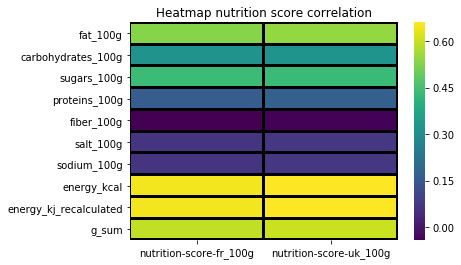

In [60]:
# And eventually a heatmap:
sns.heatmap(corr_table,linewidths=2, linecolor='black', cmap='viridis')

plt.title('Heatmap nutrition score correlation')

#### F.1 Conclusions

This heatmap gives a clear view on which variables have the highest impact on both nutritional scores.

First, I can see that the energy calculated is highly correlated to the nutritional score (which makes sense in a practical point of view).

Then, it is not a surprise that fat, carbohydrates (which has sugar included) and proteins are the most correlated macronutrients. 
Indeed, they are the macronutrients that are bringing energy and taken into account for the Kj and the Kcal calculations.

If we consider fiber, salt and sodium, they do not bring any amount of energy (source wikipedia). I am pleased then to see that there are not correlated to both nutritional scores.